## Linear Discriminant Analysis (LDA): A Deep Dive

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used primarily for dimensionality reduction and classification. Unlike Principal Component Analysis (PCA), which focuses solely on capturing the maximum variance in data without considering class labels, LDA uses the class label information to maximize class separability.

The core idea behind LDA is to find a projection (a line, plane, or hyperplane) that:

* Maximizes the distance between class means after projection,
* Minimizes the scatter (or spread) within each class.

These two goals are achieved by computing scatter matrices and solving a generalized eigenvalue problem. Given a dataset with `n` samples, `d` features, and `k` classes (labels), LDA finds a new set of axes (called linear discriminants) onto which the data can be projected such that:

* The projected class means are as far apart as possible,
* The projected class variances are as small as possible.

The number of new dimensions that LDA can reduce to is at most `k - 1`, where `k` is the number of classes.

We will go through the concept in detail, but first we need to understand two important concepts of Overall Mean and Class Mean in order to understand LDA. Overall mean and class mean are statistical concepts commonly used in data analysis, particularly in classification tasks, clustering, and dimensionality reduction techniques like LDA.

---

### Overall Mean

The overall mean refers to the average value of each feature across the entire dataset, regardless of any class or category. If a dataset contains multiple features (variables), the overall mean is computed individually for each feature across all observations.

Definition:
Given a dataset with `n` observations and `d` features, the overall mean is a vector of length `d`, where each element is the mean of the corresponding feature across all observations.

Example:
Suppose we have a dataset with two features: Height (in cm) and Weight (in kg), and five observations:

| Observation | Height | Weight |
| ----------- | ------ | ------ |
| 1           | 160    | 55     |
| 2           | 165    | 60     |
| 3           | 170    | 65     |
| 4           | 175    | 70     |
| 5           | 180    | 75     |

To compute the overall mean:

* Mean Height = (160 + 165 + 170 + 175 + 180) / 5 = 170
* Mean Weight = (55 + 60 + 65 + 70 + 75) / 5 = 65

So, the overall mean vector = \[170, 65]

This represents the central tendency of the entire dataset without considering any grouping.


### Class Mean

The class mean is the mean of each feature within individual classes or categories. It is computed by grouping the data by a categorical variable (such as gender, species, or label), and then calculating the mean of each feature within each group.

Definition:
Given a categorical class label with `k` unique values, the class mean is a set of `k` vectors (each of length `d`), where each vector represents the mean of the features within that specific class.

Example:
Consider the same dataset, but now each person is labeled with a gender:

| Observation | Height | Weight | Gender |
| ----------- | ------ | ------ | ------ |
| 1           | 160    | 55     | Male   |
| 2           | 165    | 60     | Female |
| 3           | 170    | 65     | Male   |
| 4           | 175    | 70     | Female |
| 5           | 180    | 75     | Male   |

To compute the class means:

* For Male:

  * Height = (160 + 170 + 180) / 3 = 170
  * Weight = (55 + 65 + 75) / 3 = 65
    → Class mean for Male = \[170, 65]

* For Female:

  * Height = (165 + 175) / 2 = 170
  * Weight = (60 + 70) / 2 = 65
    → Class mean for Female = \[170, 65]

In this case, both classes happen to have the same means. However, in general, class means differ between categories, which is useful in analyzing class-specific trends and for classification algorithms.

---


## The Within-Class Scatter Matrix $S_W$

This matrix captures the spread of data points within each class. The smaller the within-class scatter, the more compact each class is.

Definition:
For each class $i$, compute the scatter (like covariance) of its data points around its class mean $\mu_i$. Then sum across all classes.

$$
S_W = \sum_{i=1}^k \sum_{x \in X_i} (x - \mu_i)(x - \mu_i)^T
$$

This is a $d \times d$ matrix that accumulates the scatter within each class. This is similar to the sum of covariance matrices for each class.

* **Small scatter**: Data points are tightly packed around their class mean. Points are tightly packed -> small covariance -> easy to separate classes.
* **Large scatter**: Data points are widely spread within the class. Points are widely spread -> high overlap -> harder to separate.

Let’s say we have 2D data (Math and English scores). A tight cluster of Male students around \[80, 65] would imply low scatter, while a wide spread of scores implies high scatter.

---

## The Between-Class Scatter Matrix $S_B$

This matrix captures how far apart the means of different classes are from the overall mean.

Definition:

$$
S_B = \sum_{i=1}^k n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

Where:

* $\mu$: The overall data mean (centroid)
* $\mu_i$: The mean of class $i$
* $n_i$: Number of samples in class $i$

This also results in a $d \times d$ matrix. This matrix increases when class means are farther apart. Maximizing this means we are maximizing class separability.

---

## Fisher's Discriminant Ratio

When we project high-dimensional data onto a line (1D), we want the projected data from different classes to be as far apart as possible, and the points within each class to be tightly packed. This is illustrated using **Fisher’s Discriminant Ratio**. LDA aims to maximize the ratio of between-class variance to within-class variance.

**For Two Classes:**

Fisher’s criterion function $J(w)$ for projection vector $w$ is defined as:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

* **Numerator**: Projected distance between class means.
* **Denominator**: Projected scatter within classes.
* We want $\mu_1$ and $\mu_2$ to be **as far apart as possible** → maximize the numerator.
* We want $s_1^2 + s_2^2$ to be **as small as possible** → minimize the denominator.


We seek to find the direction $w$ that maximizes this criterion. This ensures that the classes are far apart (numerator is high) and compact within themselves (denominator is low).


For more than two classes, the Fisher ratio becomes:

$$
J(w) = \frac{d_1^2 + d_2^2 + \dots + d_k^2}{s_1^2 + s_2^2 + \dots + s_k^2}
$$

As shown in the second image:

* $d_i^2$: Squared distance between class $i$'s mean and the overall mean.
* $s_i^2$: Within-class scatter for class $i$.

The goal is still the same: maximize the numerator (between-class distances), minimize the denominator (within-class scatter).


##### Solving the Optimization Problem

The above ratio is maximized using a generalized eigenvalue problem:

$$
S_W^{-1} S_B w = \lambda w
$$

Here,

* $w$ is the eigenvector (a linear discriminant)
* $\lambda$ is the corresponding eigenvalue

We sort the eigenvalues in descending order and pick the top $k - 1$ eigenvectors to form our new feature space.

---

## LDA Projection

Once we have the top eigenvectors $w_1, w_2, ..., w_{k-1}$, we project each sample $x$ onto these directions:

$$
y = W^T x
$$

Where:

* $W$ is the matrix of selected eigenvectors (columns)
* $y$ is the lower-dimensional representation of $x$

---


## LDA with Multiple Classes

When dealing with more than two classes, LDA generalizes as follows:

* Compute the overall mean $\mu$ (Overall Mean)
* Compute $\mu_i$ for each class (Class Mean)
* Compute (Within Class Scatter Matrix) $S_W$ and (Between Class Scatter Matrix) $S_B$ using the formulas -
    * $$
S_W = \sum_{i=1}^k \sum_{x \in X_i} (x - \mu_i)(x - \mu_i)^T
$$
    * $$
S_B = \sum_{i=1}^k n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$
* Solve the eigenvalue equation $S_W^{-1} S_B w = \lambda w$
* Select the top $k - 1$ eigenvectors to form the transformation matrix $W$

**Final optimization for multiclass**:

$$
\max_W \frac{|W^T S_B W|}{|W^T S_W W|}
$$

Where: $W$ is the matrix formed by eigenvectors

---

## Example - To understand better

Let us consider two classes (Male and Female) and two features (Math and English scores).

Let’s define:

**Male samples:**

```
x1 = [78, 66]
x2 = [82, 64]
x3 = [81, 67]
```

**Female samples:**

```
x4 = [62, 84]
x5 = [58, 86]
x6 = [61, 82]
```


##### 1. Class Means

**Male mean (μ₁):**

$$
μ₁ = \frac{1}{3}([78, 66] + [82, 64] + [81, 67]) = [80.33, 65.67]
$$

**Female mean (μ₂):**

$$
μ₂ = \frac{1}{3}([62, 84] + [58, 86] + [61, 82]) = [60.33, 84.0]
$$

**Overall mean (μ):**

$$
μ = \frac{1}{6} \sum_{i=1}^{6} x_i = \frac{[78+82+81+62+58+61,\ 66+64+67+84+86+82]}{6} = [70.33, 75.0]
$$


##### 2. Between-Class Scatter Matrix $S_b$

$$
S_b = (\mu_1 - \mu)(\mu_1 - \mu)^T + (\mu_2 - \mu)(\mu_2 - \mu)^T
$$

$$
\mu_1 - \mu = [80.33 - 70.33,\ 65.67 - 75.0] = [10.0,\ -9.33]  
\mu_2 - \mu = [60.33 - 70.33,\ 84.0 - 75.0] = [-10.0,\ 9.0]
$$

Now compute:

$$
S_b = 
\begin{bmatrix}
10.0 \\
-9.33
\end{bmatrix}
\begin{bmatrix}
10.0 & -9.33
\end{bmatrix}
+
\begin{bmatrix}
-10.0 \\
9.0
\end{bmatrix}
\begin{bmatrix}
-10.0 & 9.0
\end{bmatrix}
$$

$$
= 
\begin{bmatrix}
100.0 & -93.3 \\
-93.3 & 87.07
\end{bmatrix}
+
\begin{bmatrix}
100.0 & -90.0 \\
-90.0 & 81.0
\end{bmatrix}
=
\begin{bmatrix}
200.0 & -183.3 \\
-183.3 & 168.07
\end{bmatrix}
$$



##### 3. Within-Class Scatter Matrix $S_w$

Each term is: $(x_i - μ_c)(x_i - μ_c)^T$, summed over all samples.

#### For males:

$$
x_1 - μ₁ = [78, 66] - [80.33, 65.67] = [-2.33, 0.33]  
x_2 - μ₁ = [82, 64] - [80.33, 65.67] = [1.67, -1.67]  
x_3 - μ₁ = [81, 67] - [80.33, 65.67] = [0.67, 1.33]
$$

Compute outer products:

$$
S_{w1} = 
(-2.33, 0.33)^T(-2.33, 0.33) + (1.67, -1.67)^T(1.67, -1.67) + (0.67, 1.33)^T(0.67, 1.33)
$$

$$
= 
\begin{bmatrix}
5.43 & -0.77 \\
-0.77 & 0.11
\end{bmatrix}
+
\begin{bmatrix}
2.79 & -2.79 \\
-2.79 & 2.79
\end{bmatrix}
+
\begin{bmatrix}
0.45 & 0.89 \\
0.89 & 1.77
\end{bmatrix}
=
\begin{bmatrix}
8.67 & -2.67 \\
-2.67 & 4.67
\end{bmatrix}
$$

#### For females:

$$
x_4 - μ₂ = [62, 84] - [60.33, 84.0] = [1.67, 0.0]  
x_5 - μ₂ = [58, 86] - [60.33, 84.0] = [-2.33, 2.0]  
x_6 - μ₂ = [61, 82] - [60.33, 84.0] = [0.67, -2.0]
$$

Compute:

$$
S_{w2} = 
(1.67, 0.0)^T(1.67, 0.0) + (-2.33, 2.0)^T(-2.33, 2.0) + (0.67, -2.0)^T(0.67, -2.0)
$$

$$
=
\begin{bmatrix}
2.79 & 0.0 \\
0.0 & 0.0
\end{bmatrix}
+
\begin{bmatrix}
5.43 & -4.67 \\
-4.67 & 4.0
\end{bmatrix}
+
\begin{bmatrix}
0.45 & -1.33 \\
-1.33 & 4.0
\end{bmatrix}
=
\begin{bmatrix}
8.67 & -6.0 \\
-6.0 & 8.0
\end{bmatrix}
$$

#### Total within-class scatter:

$$
S_w = S_{w1} + S_{w2} =
\begin{bmatrix}
8.67 & -2.67 \\
-2.67 & 4.67
\end{bmatrix}
+
\begin{bmatrix}
8.67 & -6.0 \\
-6.0 & 8.0
\end{bmatrix}
=
\begin{bmatrix}
17.34 & -8.67 \\
-8.67 & 12.67
\end{bmatrix}
$$

Now this matrix is invertible (its determinant is non-zero).


##### 4. Compute the LDA projection direction

We are solving the equation:

$$
w = S_w^{-1}(\mu_1 - \mu_2)
$$

Given:

* $\mu_1 = [80.33,\ 65.67]$
* $\mu_2 = [60.33,\ 84.0]$
* So $\mu_1 - \mu_2 = [20.0,\ -18.33]$
* The within-class scatter matrix $S_w$ is:

$$
S_w = \begin{bmatrix}
17.34 & -8.67 \\
-8.67 & 12.67
\end{bmatrix}
$$

We now compute the inverse of $S_w$, and then multiply it with the mean difference vector.

**Inverse of $S_w$**

Let:

$$
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
= \begin{bmatrix}
17.34 & -8.67 \\
-8.67 & 12.67
\end{bmatrix}
$$

The formula for the inverse of a 2×2 matrix is:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

**Computing determinant:**

$$
\det(S_w) = (17.34)(12.67) - (-8.67)(-8.67)  
= 219.748 - 75.1689 = 144.5791
$$

**Inverse of $S_w$:**

$$
S_w^{-1} = \frac{1}{144.5791}
\begin{bmatrix}
12.67 & 8.67 \\
8.67 & 17.34
\end{bmatrix}
$$

We can now calculate:

$$
w = S_w^{-1}(\mu_1 - \mu_2) = \frac{1}{144.5791}
\begin{bmatrix}
12.67 & 8.67 \\
8.67 & 17.34
\end{bmatrix}
\begin{bmatrix}
20.0 \\
-18.33
\end{bmatrix}
$$


Let’s compute the matrix-vector product:

$$
\text{numerator vector} = 
\begin{bmatrix}
12.67*20 + 8.67*(-18.33) \\
8.67*20 + 17.34*(-18.33)
\end{bmatrix}
$$

$$
= \begin{bmatrix}
253.4 - 158.9371 \\
173.4 - 317.5722
\end{bmatrix}
=
\begin{bmatrix}
94.4629 \\
-144.1722
\end{bmatrix}
$$


Now Multiply by $\frac{1}{144.5791}$

$$
w = \frac{1}{144.5791} 
\begin{bmatrix}
94.4629 \\
-144.1722
\end{bmatrix}
\approx
\begin{bmatrix}
0.6538 \\
-0.9972
\end{bmatrix}
$$

Final Result:

$$
w \approx \begin{bmatrix}
0.6538 \\
-0.9972
\end{bmatrix}
$$

This is the LDA projection direction - the line along which you project the 2D data to get a 1D representation that maximally separates Male and Female classes.


## Let's implement in Python - From Scratch

We will implement with 2 class first, replicating the above math.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Male samples (Class 0)
male = np.array([
    [78, 66],
    [82, 64],
    [81, 67]
])

# Female samples (Class 1)
female = np.array([
    [62, 84],
    [58, 86],
    [61, 82]
])

# Combine data
X = np.vstack((male, female))
y = np.array([0]*3 + [1]*3)

X

array([[78, 66],
       [82, 64],
       [81, 67],
       [62, 84],
       [58, 86],
       [61, 82]])

In [3]:
y

array([0, 0, 0, 1, 1, 1])

In [4]:
# Compute class means
mu_male = male.mean(axis=0)
mu_female = female.mean(axis=0)
mu_diff = mu_male - mu_female

In [6]:
# Compute within-class scatter matrix Sw
Sw = np.zeros((2, 2))
for x in male:
    diff = (x - mu_male).reshape(2, 1)
    Sw += diff @ diff.T  # Performing Matrix Multiplication
    
for x in female:
    diff = (x - mu_female).reshape(2, 1)
    Sw += diff @ diff.T

In [7]:
# Compute LDA direction w
w = np.linalg.inv(Sw) @ mu_diff
w /= np.linalg.norm(w)  # Normalize

In [8]:
# Project data onto w
projected = X @ w

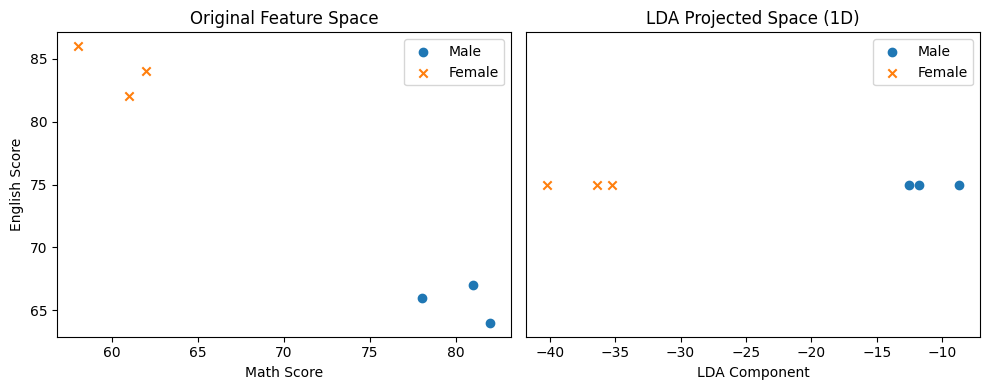

In [9]:
# Plot original and projected data
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Original space
axs[0].scatter(male[:, 0], male[:, 1], label="Male", marker='o')
axs[0].scatter(female[:, 0], female[:, 1], label="Female", marker='x')
axs[0].set_title("Original Feature Space")
axs[0].set_xlabel("Math Score")
axs[0].set_ylabel("English Score")
axs[0].legend()

# LDA projected space (1D)
axs[1].scatter(projected[:3], np.zeros(3), label="Male", marker='o')
axs[1].scatter(projected[3:], np.zeros(3), label="Female", marker='x')
axs[1].set_title("LDA Projected Space (1D)")
axs[1].set_yticks([])
axs[1].set_xlabel("LDA Component")
axs[1].legend()

plt.tight_layout()
plt.show()

Now let's check for Multi Class -

In [10]:
# Let's consider 3 classes, 4 features

# Class A
A = np.array([
    [2, 3, 1, 4],
    [3, 2, 1, 5],
    [2, 4, 2, 4]
])

# Class B
B = np.array([
    [7, 5, 6, 8],
    [6, 6, 5, 9],
    [7, 4, 5, 7]
])

# Class C
C = np.array([
    [1, 9, 8, 2],
    [2, 8, 9, 3],
    [1, 10, 9, 1]
])

# Combine data
X = np.vstack([A, B, C])
y = np.array([0]*3 + [1]*3 + [2]*3)
classes = [A, B, C]
class_labels = [0, 1, 2]

# Compute overall mean
mu_overall = X.mean(axis=0)

# Compute class means
class_means = [cls.mean(axis=0) for cls in classes]

# Compute between-class scatter matrix S_b
S_b = np.zeros((4, 4))
for cls_mean in class_means:
    n = 3  # each class has 3 samples
    diff = (cls_mean - mu_overall).reshape(4, 1)
    S_b += n * (diff @ diff.T)

# Compute within-class scatter matrix S_w
S_w = np.zeros((4, 4))
for cls, mu in zip(classes, class_means):
    for x in cls:
        diff = (x - mu).reshape(4, 1)
        S_w += diff @ diff.T

# Solve the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_w) @ S_b)

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigvals)[::-1]
eigvecs_sorted = eigvecs[:, sorted_indices]
eigvals_sorted = eigvals[sorted_indices]

eigvals_sorted

array([ 2.95913482e+02,  4.07531842e+01,  9.16087434e-15, -1.65159443e-14])

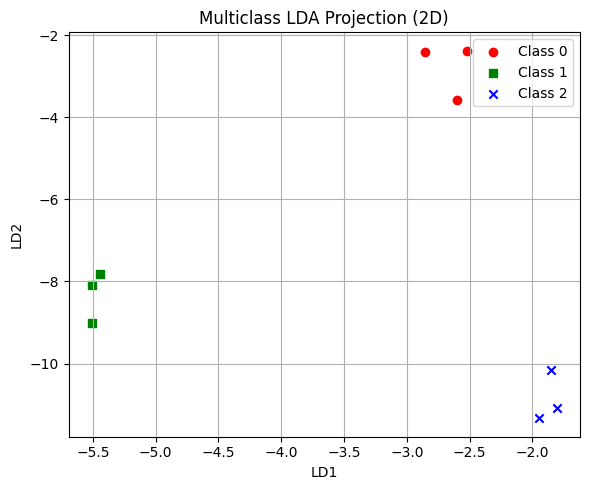

In [11]:
# Projection matrix (top 2 components for 3 classes)
W = eigvecs_sorted[:, :2]

# Project data
Z = X @ W

# Plot the projected data
plt.figure(figsize=(6, 5))
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'x']
for i, label in enumerate(class_labels):
    plt.scatter(Z[y == label, 0], Z[y == label, 1],
                label=f'Class {label}', c=colors[i], marker=markers[i])
plt.title("Multiclass LDA Projection (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## We don't have to implement from Scratch every time as we have dedicated library for LDA

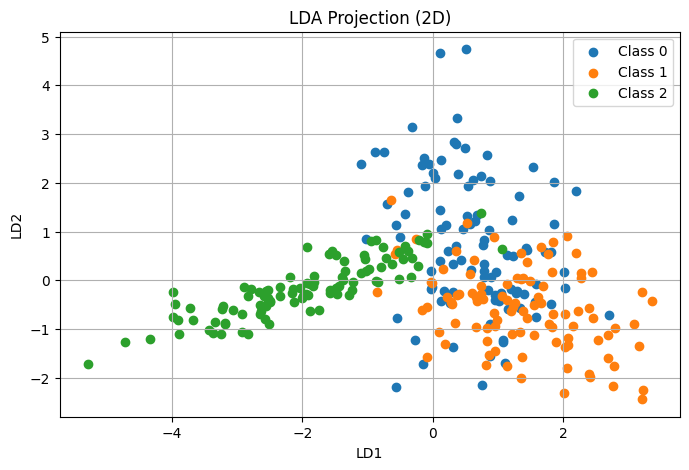

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Generate synthetic 3 class data
X, y = make_classification(n_samples=300, n_features=4, n_informative=3, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 5))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f'Class {label}')
plt.title('LDA Projection (2D)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

---

## Conclusion

LDA is a powerful linear technique that combines the concepts of class separation and compactness. It works by finding projection directions that:

* Maximize the distance between different class means (via $S_B$),
* Minimize the spread within each class (via $S_W$).

The result is a transformation that improves class separability in lower-dimensional space — essential for classification and visualization, especially when dealing with high-dimensional data. In contrast to PCA, which focuses purely on data variance, LDA’s use of labels gives it a significant edge in classification tasks.